In [ ]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
#This part linkes the dataset in the drive to the google colab file
#oldlink = 'https://drive.google.com/file/d/1TxMpCYlXbuakmrVVacn6IRT6kOVEP-Cf/view?usp=sharing'
link = 'https://drive.google.com/file/d/1TH1vQRhqoRNfuKZgVsMVnfkrjS60ChXL/view?usp=sharing'
id = link.split('/')[-2]
downloaded = drive.CreateFile({'id' : id})
downloaded.GetContentFile('StockPrices.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('StockPrices.csv')
df['Date']= pd.to_datetime(df['Date'])
df_close = df[['Date', 'Index', 'Close']] 
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199746 entries, 0 to 199745
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    199746 non-null  datetime64[ns]
 1   Index   199746 non-null  object        
 2   Close   199422 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
#Closing Prices Dataframe
df_close = df_close.pivot_table(index = 'Date', columns = 'Index', values='Close').dropna(axis=1)
df_close.head()

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-16,1338.449951,29.275536,127.150002,191.750000,613.799988,371.195007,222.789993,1692.750000,900.083496,779.799988,...,37.942738,631.775024,211.362503,219.949997,172.212494,1721.099976,77.699997,188.100006,131.025024,172.830002
2012-08-17,1326.349976,28.079990,123.500000,188.949997,625.650024,367.855011,222.039993,1696.400024,879.304443,786.650024,...,37.614040,639.299988,212.250000,220.600006,170.925003,1732.349976,76.699997,187.100006,132.562531,175.149994
2012-08-21,1357.849976,28.378876,119.849998,194.250000,627.849976,369.410004,222.139999,1712.349976,920.567871,799.099976,...,37.356804,649.325012,217.250000,223.300003,171.574997,1718.900024,74.366669,193.649994,133.406281,172.570007
2012-08-22,1361.050049,27.873070,116.550003,193.100006,632.049988,369.204987,221.600006,1724.650024,909.957275,804.150024,...,37.399677,645.825012,213.925003,223.250000,167.800003,1735.599976,72.366669,190.500000,132.937531,175.550003
2012-08-23,1346.750000,27.359596,110.800003,190.850006,638.400024,370.000000,218.929993,1710.199951,866.434143,808.599976,...,37.971317,661.724976,216.412506,223.000000,170.162506,1726.449951,74.099998,190.399994,136.162537,174.190002


In [ ]:
#Calculation of the Log Returns
df_returns = (df_close.apply(lambda x: np.log(x) - np.log(x.shift(1)))).iloc[1:]
df_returns.head() 

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-17,-0.009081,-0.041695,-0.029126,-0.014710,0.019122,-0.009039,-0.003372,0.002154,-0.023356,0.008746,...,-0.008701,0.011840,0.004190,0.002951,-0.007504,0.006515,-0.012954,-0.005331,0.011666,0.013334
2012-08-21,0.023472,0.010588,-0.030000,0.027664,0.003510,0.004218,0.000450,0.009358,0.045860,0.015703,...,-0.006862,0.015560,0.023284,0.012165,0.003796,-0.007794,-0.030894,0.034409,0.006345,-0.014840
2012-08-22,0.002354,-0.017984,-0.027921,-0.005938,0.006667,-0.000555,-0.002434,0.007157,-0.011593,0.006300,...,0.001147,-0.005405,-0.015423,-0.000224,-0.022248,0.009669,-0.027262,-0.016400,-0.003520,0.017121
2012-08-23,-0.010562,-0.018594,-0.050594,-0.011720,0.009997,0.002151,-0.012122,-0.008414,-0.049012,0.005518,...,0.015169,0.024321,0.011561,-0.001120,0.013981,-0.005286,0.023670,-0.000525,0.023970,-0.007777
2012-08-24,-0.006257,-0.021232,0.010772,-0.003938,-0.001019,-0.006358,-0.017695,0.000701,-0.066756,-0.009568,...,-0.027343,-0.000453,0.006563,-0.003819,0.024884,-0.001681,0.021363,0.007847,0.005493,0.005268


In [ ]:
#Calculation of Moving Average for Stock Price
def dailyMovingAverage(df_close, moving_avg_period):
  dates = df_close.index[moving_avg_period:] #Storing dates of the required dates
  stocks = df_close.columns #Storing stock names
  moving_avg = []
  
  for i in range(df_close.shape[0]-moving_avg_period):
    mean = df_close.iloc[i:i+moving_avg_period,:].mean()
    moving_avg.append(mean)

  return pd.DataFrame(data = moving_avg, index = dates, columns = stocks)

In [ ]:
movingAverage = dailyMovingAverage(df_close, 252)

In [ ]:
df_close.tail()

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-05,2254.800049,2698.399902,810.250000,382.649994,4374.100098,3473.899902,728.500000,4013.100098,15085.849609,5257.700195,...,107.349998,3365.050049,1058.199951,2432.800049,1556.550049,6775.200195,743.450012,253.250000,440.000000,357.600006
2022-08-08,2224.600098,2791.899902,801.650024,380.200012,4427.350098,3458.449951,745.549988,4022.649902,15530.650391,5318.399902,...,107.199997,3374.449951,1056.599976,2446.949951,1555.099976,6677.850098,749.150024,256.750000,435.850006,360.700012
2022-08-10,2227.000000,2827.199951,790.549988,380.049988,4517.149902,3411.649902,739.000000,4034.850098,15643.200195,5363.049805,...,109.199997,3354.250000,1055.199951,2433.600098,1542.900024,6595.649902,765.299988,256.350006,430.149994,364.549988
2022-08-11,2228.899902,2834.050049,792.750000,380.200012,4429.649902,3405.199951,758.849976,4033.500000,15736.950195,5330.799805,...,109.099998,3422.500000,1077.250000,2472.350098,1535.650024,6597.100098,767.500000,256.549988,438.450012,381.700012
2022-08-12,2227.600098,2864.550049,788.349976,384.799988,4312.750000,3427.850098,760.549988,4038.000000,15765.450195,5314.850098,...,112.650002,3401.550049,1065.900024,2471.949951,1539.949951,6559.299805,788.900024,262.450012,436.100006,386.850006


In [ ]:
df_close.head()

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-16,1338.449951,29.275536,127.150002,191.750000,613.799988,371.195007,222.789993,1692.750000,900.083496,779.799988,...,37.942738,631.775024,211.362503,219.949997,172.212494,1721.099976,77.699997,188.100006,131.025024,172.830002
2012-08-17,1326.349976,28.079990,123.500000,188.949997,625.650024,367.855011,222.039993,1696.400024,879.304443,786.650024,...,37.614040,639.299988,212.250000,220.600006,170.925003,1732.349976,76.699997,187.100006,132.562531,175.149994
2012-08-21,1357.849976,28.378876,119.849998,194.250000,627.849976,369.410004,222.139999,1712.349976,920.567871,799.099976,...,37.356804,649.325012,217.250000,223.300003,171.574997,1718.900024,74.366669,193.649994,133.406281,172.570007
2012-08-22,1361.050049,27.873070,116.550003,193.100006,632.049988,369.204987,221.600006,1724.650024,909.957275,804.150024,...,37.399677,645.825012,213.925003,223.250000,167.800003,1735.599976,72.366669,190.500000,132.937531,175.550003
2012-08-23,1346.750000,27.359596,110.800003,190.850006,638.400024,370.000000,218.929993,1710.199951,866.434143,808.599976,...,37.971317,661.724976,216.412506,223.000000,170.162506,1726.449951,74.099998,190.399994,136.162537,174.190002


In [ ]:
y_dataset = df_close['2013-08-27':]

In [ ]:
y_dataset.shape

(2210, 81)

In [ ]:
y_dataset.to_csv('y_dataset.csv')

In [ ]:
movingAverage.head()

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-27,1293.284725,33.280637,137.715674,191.474405,837.924406,440.493611,255.536071,1875.560316,774.573762,877.487697,...,32.843988,719.038689,248.716964,262.259523,182.051042,1892.318452,87.127645,164.846428,144.108517,161.413770
2013-08-28,1291.714685,33.254514,137.701190,191.346429,838.994049,440.647599,255.348532,1875.699205,773.290296,877.566666,...,32.796370,720.180058,249.230307,262.266467,182.167064,1891.642262,87.196031,164.768055,144.265586,161.248731
2013-08-29,1290.200201,33.232131,137.698413,191.231945,839.918652,440.743413,255.132460,1875.823610,772.137302,877.568451,...,32.752590,721.428669,249.747421,262.233729,182.278869,1890.576190,87.268253,164.696825,144.441107,161.071032
2013-08-30,1288.613693,33.211238,137.729762,191.113691,840.852977,440.877500,254.926151,1875.935118,770.848938,877.612697,...,32.709584,722.715276,250.240030,262.208332,182.391667,1889.500992,87.333994,164.692063,144.616256,160.906151
2013-09-02,1287.038495,33.186696,137.767063,191.028374,841.775596,441.082838,254.707857,1876.380951,769.579663,877.615277,...,32.664764,724.186606,250.755208,262.213888,182.534524,1888.466269,87.399735,164.685119,144.808369,160.728611


In [ ]:
movingAverage.head()

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-27,1293.284725,33.280637,137.715674,191.474405,837.924406,440.493611,255.536071,1875.560316,774.573762,877.487697,...,32.843988,719.038689,248.716964,262.259523,182.051042,1892.318452,87.127645,164.846428,144.108517,161.413770
2013-08-28,1291.714685,33.254514,137.701190,191.346429,838.994049,440.647599,255.348532,1875.699205,773.290296,877.566666,...,32.796370,720.180058,249.230307,262.266467,182.167064,1891.642262,87.196031,164.768055,144.265586,161.248731
2013-08-29,1290.200201,33.232131,137.698413,191.231945,839.918652,440.743413,255.132460,1875.823610,772.137302,877.568451,...,32.752590,721.428669,249.747421,262.233729,182.278869,1890.576190,87.268253,164.696825,144.441107,161.071032
2013-08-30,1288.613693,33.211238,137.729762,191.113691,840.852977,440.877500,254.926151,1875.935118,770.848938,877.612697,...,32.709584,722.715276,250.240030,262.208332,182.391667,1889.500992,87.333994,164.692063,144.616256,160.906151
2013-09-02,1287.038495,33.186696,137.767063,191.028374,841.775596,441.082838,254.707857,1876.380951,769.579663,877.615277,...,32.664764,724.186606,250.755208,262.213888,182.534524,1888.466269,87.399735,164.685119,144.808369,160.728611


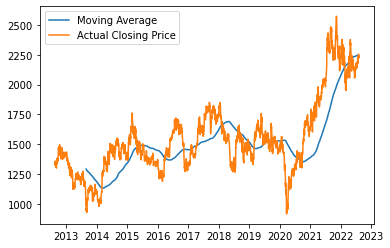

In [ ]:
plt.plot(movingAverage.iloc[:,0], label = 'Moving Average')
plt.plot(df_close.iloc[:,0], label = 'Actual Closing Price')
plt.legend()
plt.show()

In [ ]:
df_close.shape

(2462, 81)

In [ ]:
movingAverage.shape

(2210, 81)

In [ ]:
## Exporting the Dataset
from google.colab import drive
drive.mount('drive')

movingAverage.to_csv('MovingAverage.csv')
!cp MovingAverage.csv "drive/My Drive/Machine Learning Project/ML Section Exports"

Mounted at drive


**Leniar Regression **


In [ ]:
#Dataset we are compressing, column level 0 = Stock, column level 1 = feature
raw_df = df.drop(columns = ['Close']).set_index(['Date' , 'Index']).unstack(level = 1).stack(level = 0).unstack()
raw_df = raw_df.dropna(axis = 1)
raw_df.head()

Index            ACC.NS                                                   \
               Adjusted         High          Low         Open    Volume   
Date                                                                       
2012-08-16  1118.372803  1358.050049  1335.099976  1356.000000  124774.0   
2012-08-17  1108.262207  1338.449951  1320.150024  1335.150024  190538.0   
2012-08-21  1134.583008  1363.000000  1320.000000  1330.000000  175534.0   
2012-08-22  1137.256836  1370.800049  1345.199951  1351.500000  180195.0   
2012-08-23  1125.308228  1367.900024  1340.000000  1366.000000  139318.0   

Index      ADANIENT.NS                                               ...  \
              Adjusted       High        Low       Open      Volume  ...   
Date                                                                 ...   
2012-08-16   25.636400  29.934618  29.076279  29.428810  19347550.0  ...   
2012-08-17   24.589470  29.635733  27.911388  29.168243  12669145.0  ...   
2012-08-21   24.851204  28.501497  27.796431  28.056999   6533952.0  ...   
2012-08-22   24.408272  28.585798  27.673811  28.432524   4595085.0  ...   
2012-08-23   23.958626  28.102982  27.168003  27.750448   7544247.0  ...   

Index         WIPRO.NS                                                 \
              Adjusted        High         Low        Open     Volume   
Date                                                                    
2012-08-16  119.455681  133.012527  130.125031  132.825027  2958828.0   
2012-08-17  120.857437  132.937531  129.937531  131.025024  2859857.0   
2012-08-21  121.626656  134.437531  131.493774  131.493774  3014847.0   
2012-08-22  121.199318  134.043777  131.343781  133.125031  4334300.0   
2012-08-23  124.139565  137.531281  133.368790  133.368790  4852956.0   

Index      ZYDUSLIFE.NS                                                
               Adjusted        High         Low        Open    Volume  
Date                                                                   
2012-08-16   153.041046  173.940002  170.199997  173.809998  465130.0  
2012-08-17   155.095383  175.949997  173.000000  173.000000   77795.0  
2012-08-21   152.810791  177.800003  170.199997  175.399994  291750.0  
2012-08-22   155.449600  177.970001  173.000000  173.000000  226630.0  
2012-08-23   154.245285  177.539993  173.059998  176.000000  114420.0  

[5 rows x 405 columns]

In [ ]:
raw_df = raw_df.to_numpy()
raw_df.shape

(2462, 405)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Scaling the data
raw_df_scaled = MinMaxScaler().fit_transform(raw_df)

#Performing PCA ~ Reducing Dimensionality
PCA = PCA(n_components=382)
PCA_df = PCA.fit_transform(raw_df_scaled)

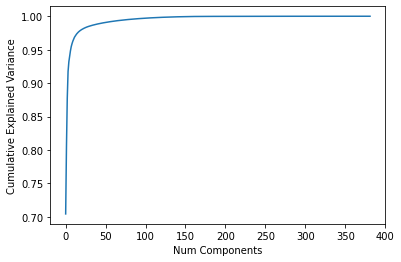

In [ ]:
plt.plot(np.cumsum(PCA.explained_variance_ratio_))
plt.xlabel('Num Components')
plt.ylabel('Cumulative Explained Variance');

In [ ]:
dates = df_close.index
stocks = df_close.columns
PC_labs = []
for i in range(PCA_df.shape[1]):
  lab = "PC" + str(i+1)
  PC_labs.append(lab)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

#Using the full features dataset, the closing prices; we are able to fit a line over a specified time period
def predict_prices(raw_df, close, time, lookback, forward, stock_num):
  
  #PCA
  pca1 = PCA(n_components = 10)
  pca2 = PCA(n_components = 10)


  #Training data = t - forward - lookback
  X_train = raw_df[time-forward-lookback:time-forward,:]
  X_train = MinMaxScaler().fit_transform(X_train)
  X_train = pca1.fit_transform(X_train)
  y_train = close.iloc[time-forward+1:time+1,stock_num]

  #Testing = t - lookback
  X_test = raw_df[time-lookback:time,:]
  X_test = MinMaxScaler().fit_transform(X_test)
  X_test = pca2.fit_transform(X_test)
  y_test = close.iloc[time+1 : time+forward+1, stock_num]

  LR = LinearRegression()
  LR.fit(X_train, y_train)
  predicted = LR.predict(X_test)
  # print(mean_squared_error(y_test,predicted))

  return predicted, y_test

In [ ]:
#This function creates the entire table of features
def construct_prediction_tab(full_features_df,closing_prices_df):
  predictions = []
  actuals = [] 
  
  for stocks in range(closing_prices_df.shape[1]):
    stock_predictions = []
    stock_actuals = []
    
    for dates in range(60, df_close.shape[0], 30): 
      pred, act = predict_prices(full_features_df, closing_prices_df, dates, 30, 30, stocks)
      stock_predictions.append(pred)
      stock_actuals.append(act)
 
    import numpy as np
    stock_predictions = np.concatenate(stock_predictions)
    stock_actuals = np.concatenate(stock_actuals)

    predictions.append(stock_predictions)
    actuals.append(stock_actuals)

  return predictions, actuals

In [ ]:
pred, act = construct_prediction_tab(raw_df, df_close)

In [ ]:
# Need to get rid of 60 days for initial prediction window
final_actuals = pd.DataFrame(data = act, index=stocks, columns = dates[61:]).transpose()
final_preds = pd.DataFrame(data = pred, index = stocks).transpose() #Trimming because it predicts extra dates into future

In [ ]:
final_preds = final_preds.iloc[:2401,:]
final_preds.index = dates[61:]

In [ ]:
final_actuals.head()

Index,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-20,1378.900024,34.057716,123.199997,195.750000,855.799988,384.994995,243.789993,1827.699951,829.000000,849.950012,...,34.350918,636.400024,221.050003,290.000000,163.562500,1900.550049,74.933334,163.850006,135.656281,160.059998
2012-11-21,1384.300049,34.502216,123.050003,199.449997,839.099976,391.989990,247.270004,1819.349976,824.650024,840.000000,...,34.751068,641.099976,226.162506,297.299988,162.475006,1932.400024,73.333336,166.300003,137.550034,159.070007
2012-11-22,1391.650024,34.310619,122.800003,202.100006,849.650024,396.804993,251.410004,1815.449951,853.750000,837.400024,...,34.865398,638.224976,227.524994,294.000000,160.300003,1899.449951,73.333336,167.300003,139.050034,163.440002
2012-11-23,1381.300049,34.655491,123.349998,203.250000,848.549988,405.410004,251.350006,1817.900024,861.599976,833.400024,...,34.760597,644.299988,225.912506,296.299988,160.449997,1896.050049,74.033333,166.050003,137.568787,164.279999
2012-11-26,1382.800049,35.038677,125.349998,201.100006,851.650024,408.339996,253.160004,1821.099976,878.650024,829.299988,...,35.427509,646.849976,226.975006,298.799988,163.412506,1868.599976,73.366669,167.949997,140.793777,164.770004


In [ ]:
from google.colab import drive
drive.mount('drive')

final_actuals.to_csv('LR_Actual_Prices.csv')
!cp LR_Actual_Prices.csv "drive/My Drive/Machine Learning Project/ML Section Exports"

final_preds.to_csv('LR_Predicted_Prices.csv')
!cp LR_Predicted_Prices.csv "drive/My Drive/Machine Learning Project/ML Section Exports"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Three different Prediction Windows
p1 , t1 = predict_prices(raw_df, df_close, 60, 30, 30, 5)
p2 , t2 = predict_prices(raw_df, df_close, 90, 30, 30, 5)
p3 , t3 = predict_prices(raw_df, df_close, 120, 30, 30, 5)

In [ ]:
predictions = np.concatenate([p1,p2,p3])
actuals = np.concatenate((t1,t2))

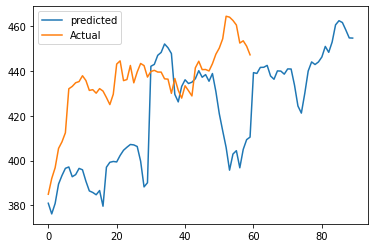

In [ ]:
#This is a plt for the first 90 days of predictions for the first stock
plt.plot(predictions, label = 'predicted')
plt.plot(actuals, label = 'Actual')
plt.legend()
plt.show()

In [ ]:
stock_predictions = []
stock_actuals = []

for i in range(60,df_close.shape[0], 30):
  pred, act = predict_prices(raw_df, df_close, i, 30, 30, 5)
  stock_predictions.append(pred)
  stock_actuals.append(act)

In [ ]:
stock_predictions = np.concatenate(stock_predictions)
stock_actuals = np.concatenate(stock_actuals)

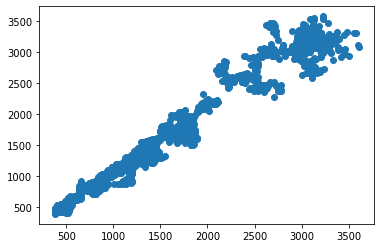

In [ ]:
# Q-Q plot for predictions vs actuals
plt.scatter(x = stock_predictions[:2401], y = stock_actuals)

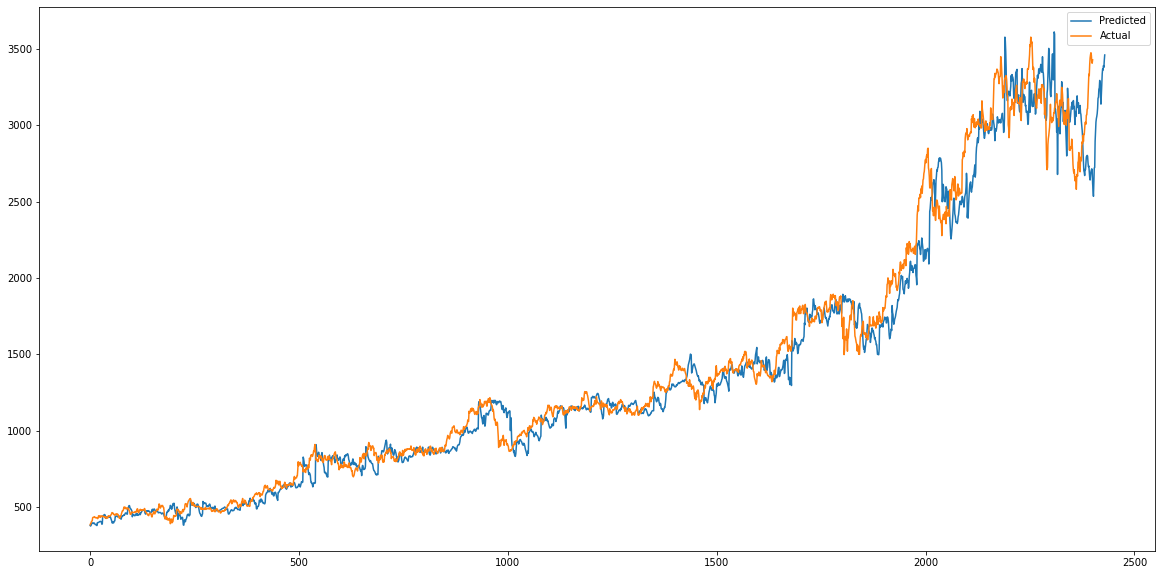

In [ ]:
#Full Prediction vs Actuals for the same stock
plt.figure(figsize=(20,10))
plt.plot(stock_predictions, label = 'Predicted')
plt.plot(stock_actuals, label = 'Actual')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(final_actuals, final_preds)

118.2715725505639